In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Let's Implement DBSCAN Clustering from scratch using numpy and matplotlib

### Firt we need data let's create a data

In [403]:
X,y = make_moons(500,noise=0.1)

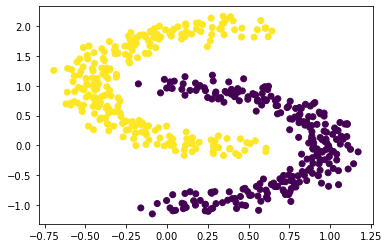

In [404]:
# Let's plot our data. we can see there are totally 3 clusters

plt.scatter(X[:,1],X[:,0],c=y)

In [191]:
# Lots of times We are going calculate distance between data points, so let's define a function to calculate distance
def cal_distance(a,b):
    return np.linalg.norm((a-b))

In [357]:
# lets' create a function to cluster data pointsbased on the distance

def cluster_points(X,eps,min_points):
    classified_points=[]            # To store classified points
    lables=["Nan"]*X.shape[0]       # creating lable or target cluster it will be like ["Nan","Nan","Nan","Nan","Nan"]
    target=0                        # In the first iterration it will be 0 then will will update it as cluters increases

# First we have to take a random number and calculate distance between all the datapoints and find it's neighbours

    while "Nan" in lables:                               # it will run untill we don't have any 'Nan' value in lables
        
#         print('Current_Lable ',lables,'\n')             

        pt = lables.index("Nan")                         # Choosing an unclassified data point 
    
        if pt not in classified_points:                   # if the randomly choosen point should be a new point 
            
            
            neighbours=[]                                 # If we find any neighbours then we will append it to this list
            neighbout_index=[]                            # also the index of the neighbours

            for i in range(X.shape[0]):                   # Calculating distance between all the datapoints from randomly choosen point
                
                if cal_distance(X[pt],X[i])<eps:          # If the distance is lesser than eps value then we need to add it in neighbours list
                    neighbours.append(X[i])
                    neighbout_index.append(i)             # Also it's index number
                    
#if the randomly choosen data point has lesser neighbours than Min_points 
# Then we will consider it as Noise. so we are assigning -1 (-1 means Noise)

            if len(neighbours)<min_points:
                for i in neighbout_index:
                    lables[i]=-1
                    classified_points.append(i)
                    
#if the randomly choosen data point has more neighbours than Min_points 

# We can group it as one cluster. so we are assigning 0 to this first cluster

            if len(neighbours)>=min_points:
                for i in neighbout_index:
                    lables[i]=target
                    classified_points.append(i)            # also we are adding it into classified points to track.
                    
#                 print('passing_neigbour: ',neighbout_index,'\n')
#                 print('Updated_Lables ',lables,'\n')

# Now we will take this cluster and tack all the neighbour one by one from this cluster and find it's neighbours.

# and it will repeat untill the lables has no 'Nan' value in it
                
                # This recursive funtion will calculate distance from each and every neighbours to all other points
                # And it will update the lables
                sub_cluster(X,neighbours,neighbout_index,lables,eps,min_points,target,classified_points) 
                target+=1      # After completing one cluster we need to add target value by 1, to lable different values for clusters 
    return lables
        



In [358]:
# This is the recursive function 

def sub_cluster(X,neighbours,neighbout_index,lables,eps,min_points,target,classified_points):
    
    for i in neighbout_index:
        sub_neighbours=[]
        sub_neighbout_index=[]

#         print("Checking for i: ",i,'\n')

        for j in range(len(X)):
            if cal_distance(X[i],X[j])<eps:
                if j not in classified_points and j not in neighbout_index:
                    
                    sub_neighbours.append(X[j])
                    sub_neighbout_index.append(j)
                    lables[j]=target
                    classified_points.append(j)
                    
#                     print("adding j: ",j,'\n')
#                     print("Classified_point: ",classified_points,'\n')
                    
#         print("Sub_Neig: ",sub_neighbout_index," for ",i,'\n')

        if len(sub_neighbout_index)>1:
            
#             print("passed: ",sub_neighbout_index)

            sub_cluster(X,sub_neighbours,sub_neighbout_index,lables,eps,min_points,target,classified_points)
            
    
#             print("completed for: ",sub_neighbout_index,'\n')
#     print("Looking for new set of point",'\n')

    return lables,classified_points
    

In [411]:
lables=cluster_points(X,0.17,5)

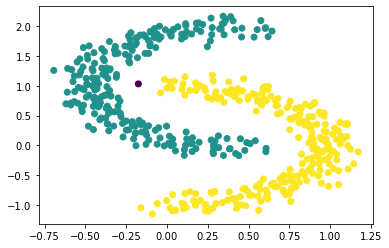

In [412]:
# Let's plot our data. we can see there are totally 3 clusters

plt.scatter(X[:,1],X[:,0],c=lables)

In [152]:
def cluster_points(X,eps,min_points):
    classified_points=[]
    lables=["Nan"]*X.shape[0]
    target=0
    while "Nan" in lables:
        
#         print('Current_Lable ',lables,'\n')

        pt=np.random.choice(X.shape[0],1,replace=False)
        if pt not in classified_points:
            
            neighbours=[]
            neighbout_index=[]

            for i in range(X.shape[0]):
                if cal_distance(X[pt],X[i])<eps:
                    neighbours.append(X[i])
                    neighbout_index.append(i)
            if len(neighbours)<min_points:
                for i in neighbout_index:
                    lables[i]=-1
                    classified_points.append(i)
            if len(neighbours)>=min_points:
                for i in neighbout_index:
                    lables[i]=target
                    classified_points.append(i)
                    
#                 print('passing_neigbour: ',neighbout_index,'\n')
#                 print('Updated_Lables ',lables,'\n')

                sub_cluster(X,neighbours,neighbout_index,lables,eps,min_points,target,classified_points)
                target+=1
    return lables
        